## Data Cleaning Checklist 
- Replace all empty values with unknown
- Remove first column that is unnamed
- Remove content-id column 
- Make all text lowercase in hl1 hl2 lede body columns 
- Remove extra whitespace in hl1 hl2 lede body columns 
- Replace all insufficient body text with the text in the lede column 
- Clean body using regex 
- Before stop words: create a column actual_body_word_count that has the true word count of the body BEFORE it is cleaned and sto[ words are removed

### Columns you should have by the end of cleaning:
- position_section
- Position_subsection
- Year
- indexing_terms
- H1
- H2
- Lede
- Body
- Author
- Actual_body_word_count (before cleaning the body since word counts were inaccurate)
- Body_cleaned (this as after removing stop words and punctuation)

### Import Modules

In [85]:
import pandas as pd
import re
import missingno as msno

In [86]:
df = pd.read_csv('2020_articles_mass.csv')
df.head(2)

,Unnamed: 0,position_section,position_subsection,hl1,hl2,author,lede,body,word_count,content-id,pub_date,indexing_terms,year
0,1159,SPORTS,NaN,NaN,NaN,NaN,al east w l pct. gb wcgb last 10 streak ta...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,375.0,BGLOBE-e0ed52bcf60311ea837e1da39af2b2bc,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020
1,1160,NEWS,Metro,Report: State funding formula too generous to ...,NaN,NaN,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",983.0,BGLOBE-0a79019ef60e11ea9dd0bc5757d6c4bf,2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020


<Axes: >

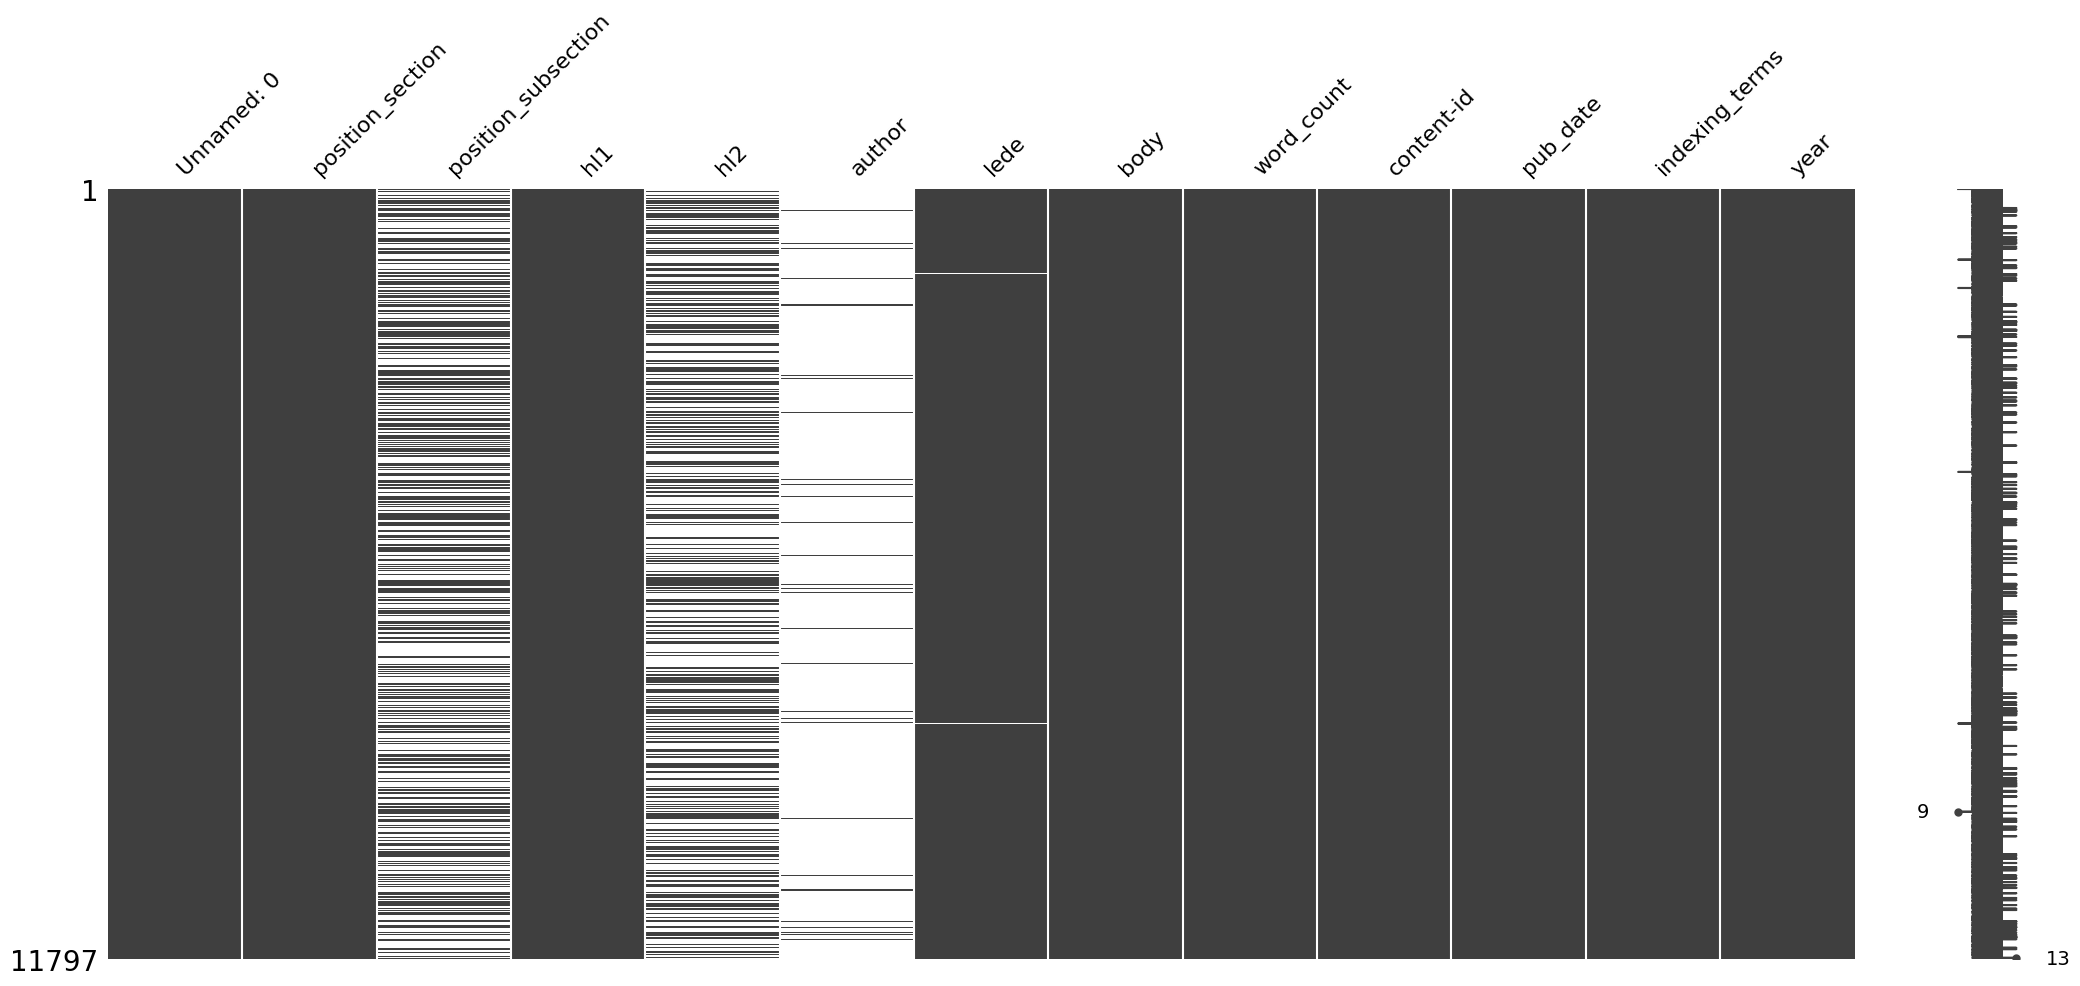

In [87]:
msno.matrix(df)

In [88]:
df.fillna('unknown', inplace=True)

In [89]:
df.head(3)

,Unnamed: 0,position_section,position_subsection,hl1,hl2,author,lede,body,word_count,content-id,pub_date,indexing_terms,year
0,1159,SPORTS,unknown,unknown,unknown,unknown,al east w l pct. gb wcgb last 10 streak ta...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,375.0,BGLOBE-e0ed52bcf60311ea837e1da39af2b2bc,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020
1,1160,NEWS,Metro,Report: State funding formula too generous to ...,unknown,unknown,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",983.0,BGLOBE-0a79019ef60e11ea9dd0bc5757d6c4bf,2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020
2,1166,NEWS,Metro,"State surpasses 9,000 COVID-19 deaths",Towns contend with parties involving young people,unknown,the state announced sunday that the death coun...,"body in sudbury, a large party involving 50 to...",413.0,BGLOBE-45ad04def61511ea9dd0bc5757d6c4bf,2020-09-14,"{'subject': [{'score': '92', 'classCode': 'ST0...",2020


In [90]:
df = df.drop(['Unnamed: 0', 'content-id'], axis=1)

In [91]:
df.head(3)

,position_section,position_subsection,hl1,hl2,author,lede,body,word_count,pub_date,indexing_terms,year
0,SPORTS,unknown,unknown,unknown,unknown,al east w l pct. gb wcgb last 10 streak ta...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,375.0,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020
1,NEWS,Metro,Report: State funding formula too generous to ...,unknown,unknown,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",983.0,2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020
2,NEWS,Metro,"State surpasses 9,000 COVID-19 deaths",Towns contend with parties involving young people,unknown,the state announced sunday that the death coun...,"body in sudbury, a large party involving 50 to...",413.0,2020-09-14,"{'subject': [{'score': '92', 'classCode': 'ST0...",2020


<Axes: >

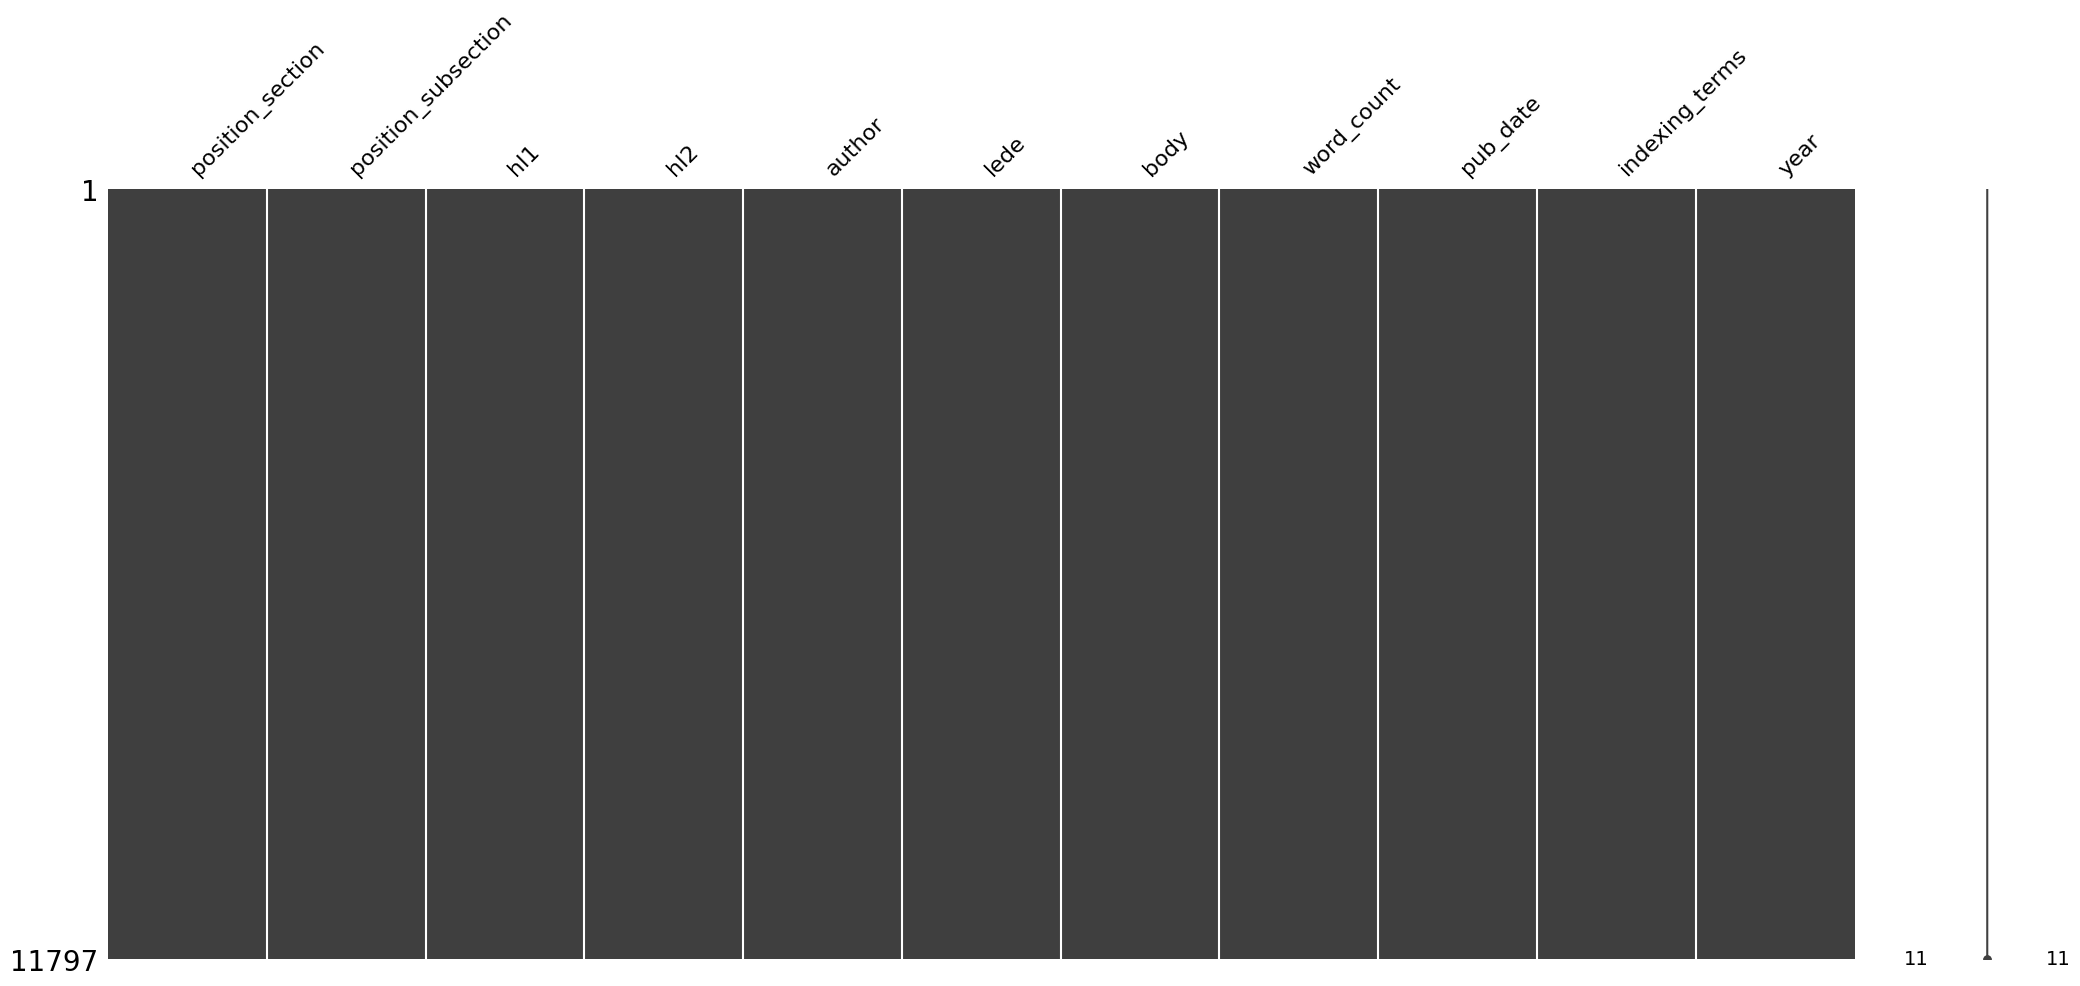

In [92]:
# Using MSNO module - missing values represented as horizontal lines.
msno.matrix(df)

### Columns_to_lowercase

In [93]:
columns_to_lowercase = ['hl1', 'hl2', 'lede', 'body']
df[columns_to_lowercase] = df[columns_to_lowercase].apply(lambda x: x.str.lower())

In [94]:
df.head(2)

,position_section,position_subsection,hl1,hl2,author,lede,body,word_count,pub_date,indexing_terms,year
0,SPORTS,unknown,unknown,unknown,unknown,al east w l pct. gb wcgb last 10 streak ta...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,375.0,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020
1,NEWS,Metro,report: state funding formula too generous to ...,unknown,unknown,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",983.0,2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020


### Strip Whitespace

In [95]:
df[columns_to_lowercase] = df[columns_to_lowercase].apply(lambda x: x.str.strip().replace('\s+', ' ', regex=True))

In [96]:
df.head(2)

,position_section,position_subsection,hl1,hl2,author,lede,body,word_count,pub_date,indexing_terms,year
0,SPORTS,unknown,unknown,unknown,unknown,al east w l pct. gb wcgb last 10 streak tampa ...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,375.0,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020
1,NEWS,Metro,report: state funding formula too generous to ...,unknown,unknown,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",983.0,2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020


### Replace insufficient 'body' with 'lede'

In [97]:
df.loc[df['body'] == 'body', 'body'] = df['lede']

### Clean 'body' with REGEX

In [98]:
#imports for Regex
from tqdm import tqdm
tqdm.pandas()
import re
# Clean Bodies using Regex
func_clean_body = lambda x: ' '.join(re.findall(r'[A-Za-z0-9!@#$%^&*()]+', x))
df['body_regex_cleaned'] = df['body'].progress_apply(func_clean_body)
df.head(2)

100%|██████████████████████████████████| 11797/11797 [00:00<00:00, 14889.86it/s]


,position_section,position_subsection,hl1,hl2,author,lede,body,word_count,pub_date,indexing_terms,year,body_regex_cleaned
0,SPORTS,unknown,unknown,unknown,unknown,al east w l pct. gb wcgb last 10 streak tampa ...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,375.0,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020,body boston 17 31 354 13 9 5 5 w 1 central w l...
1,NEWS,Metro,report: state funding formula too generous to ...,unknown,unknown,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",983.0,2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020,body this research and analysis shows that the...


In [99]:
def word_count(text):
    return len(text.split())

df['actual_body_count'] = df['body'].apply(word_count)

In [100]:
# imports for
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
func_remove_stop = lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words])

df['body_regex_cleaned_stop_words'] = df['body_regex_cleaned'].progress_apply(func_remove_stop)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abdulrafay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abdulrafay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|████████████████████████████████████| 11797/11797 [00:12<00:00, 955.84it/s]


### Keep Only following : 
- position_section
- Position_subsection
- Year
- indexing_terms
- H1
- H2
- Lede
- Body
- Author
- Actual_body_word_count (before cleaning the body since word counts were inaccurate)
- Body_cleaned (this as after removing stop words and punctuation)

In [101]:
df.head(2)

,position_section,position_subsection,hl1,hl2,author,lede,body,word_count,pub_date,indexing_terms,year,body_regex_cleaned,actual_body_count,body_regex_cleaned_stop_words
0,SPORTS,unknown,unknown,unknown,unknown,al east w l pct. gb wcgb last 10 streak tampa ...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,375.0,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020,body boston 17 31 354 13 9 5 5 w 1 central w l...,461,body boston 17 31 354 13 9 5 5 w 1 central w l...
1,NEWS,Metro,report: state funding formula too generous to ...,unknown,unknown,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",983.0,2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020,body this research and analysis shows that the...,811,body research analysis shows massive scale ine...


In [102]:
df = df.rename(columns={'body_regex_cleaned_stop_words' : 'body_cleaned'})

In [103]:
df = df.drop(columns=['word_count', 'body_regex_cleaned'])

In [104]:
df.head(3)

,position_section,position_subsection,hl1,hl2,author,lede,body,pub_date,indexing_terms,year,actual_body_count,body_cleaned
0,SPORTS,unknown,unknown,unknown,unknown,al east w l pct. gb wcgb last 10 streak tampa ...,body boston 17 31 .354 13½ 9½ 5-5 w 1 central ...,2020-09-14,"{'city': [{'score': '90', 'classCode': 'GX567'...",2020,461,body boston 17 31 354 13 9 5 5 w 1 central w l...
1,NEWS,Metro,report: state funding formula too generous to ...,unknown,unknown,the state's formula for funding public schools...,"body ""this research and analysis shows that th...",2020-09-14,"{'subject': [{'score': '90', 'classCode': 'Z3V...",2020,811,body research analysis shows massive scale ine...
2,NEWS,Metro,"state surpasses 9,000 covid-19 deaths",towns contend with parties involving young people,unknown,the state announced sunday that the death coun...,"body in sudbury, a large party involving 50 to...",2020-09-14,"{'subject': [{'score': '92', 'classCode': 'ST0...",2020,350,body sudbury large party involving 50 60 linco...


### export as .csv

In [105]:
df.to_csv('Cleaned_2020_articles_mass.csv', index=False)